## Task #1: Prediction using Supervised Machine Learning


### GRIP@ The Spark Foundation

### Author: Jyoti Adate

### Problem Statement-
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.



In [21]:
# import Lybraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [22]:
data=pd.read_csv('Student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [23]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [25]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [27]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot

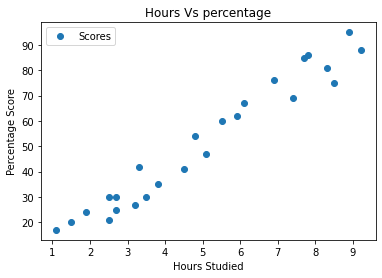

In [5]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

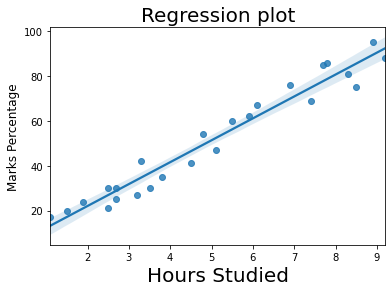

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [29]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Regression plot',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=20)
plt.show()
print(data.corr())

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [32]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values



Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [33]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [9]:
line=regressor.coef_*X+regressor.intercept_


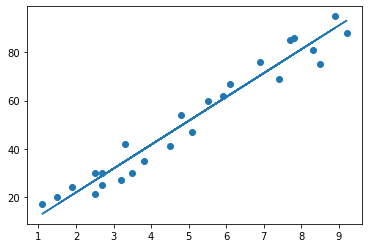

In [10]:
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test)
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Predicting the percentage of Marks

In [37]:
pred_y=regressor.predict(X_test)
prediction=pd.DataFrame({"Hours": [i[0] for i in X_test],'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### Comparing the Predicted Marks with the Actual Marks

In [38]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Comparing the Predicted Marks with the Actual Marks

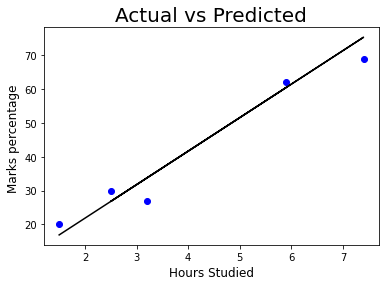

In [42]:
plt.scatter(x=X_test,y=y_test,color='blue')
plt.plot(X_test,pred_y,color='black')
plt.title('Actual vs Predicted',size=20)
plt.ylabel('Marks percentage ',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

### What will be the predicted score if a student studies for 9.25 hrs/ day?

In [47]:
hours=[9.25]
pred=regressor.predict([hours])
print('No of Hours={}'.format([hours]))
print('Predicted Score={}'.format(pred[0]))

No of Hours=[[9.25]]
Predicted Score=93.69173248737539


According to the regression model if a student studies for 9.25 hours a day.
it likely to score 93.89 marks.



### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [52]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(X_test,y_pred))

Mean Absolute Error: 38.55185161206785
